In [1]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

Request :
Following the previous request, some company managers are afraid that discounting will reduce profit, so they have asked you to check the effect of discounting on the amount of profit and if there is such an effect, describe it.
solution :
To determine if discounts have a significant effect on profit, you can perform hypothesis testing. You may use a t-test or ANOVA to compare the profitability of products or time periods with and without discounts. For example, you might compare the average profit of discounted sales to non-discounted sales.

In [3]:
from sqlalchemy import create_engine, Column, Integer, String, MetaData, Table

# Initialize SQLAlchemy Metadata object
meta = MetaData()
# Define database connection details
USERNAME = 'root'
PASSWORD = '1393ram1393#$'
SERVER = 'localhost'
# Create a SQLAlchemy engine for connecting to the MySQL database
engine = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{SERVER}:3306/Laptop_analysis_and_Warehousing_g3', echo=True)
conn = engine.connect()

2023-10-25 11:22:53,036 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-10-25 11:22:53,036 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-25 11:22:53,039 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-10-25 11:22:53,040 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-25 11:22:53,041 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-10-25 11:22:53,042 INFO sqlalchemy.engine.Engine [raw sql] {}


In [4]:
metadata = MetaData()

# Replace "your_table_name" with the name of your table
table_name = "order"

your_table = Table(table_name, metadata, autoload=True, autoload_with=engine)


2023-10-25 11:23:56,953 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `order`
2023-10-25 11:23:56,954 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-25 11:23:57,030 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%(table_data_1_1)s, %(table_data_1_2)s, %(table_data_1_3)s));
                
2023-10-25 11:23:57,030 INFO sqlalchemy.engine.Engine [generated in 0.07203s] {'table_data_1_1': 'laptop_analysis_and_warehousing_g3', 'table_data_1_2': 'laptop', 'table_data_1_3': 'laptop_id'}
2023-10-25 11:23:57,034 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `laptop`
2023-10-25 11:23:57,034 INFO sqlalchemy.engine.Engine [raw sql] {}


In [21]:
from sqlalchemy.orm import sessionmaker

Session = sessionmaker(bind=engine)

# Assuming you have a session and SQLAlchemy model defined as mentioned before
session = Session()

# Define the columns you want to read
Price = your_table.c.Total_Price
Discount = your_table.c.Discount
Profit = your_table.c.Profit

# Query the database to fetch the data for the specified columns
results = session.query(Price, Discount, Profit).all()

# Convert the results to a Pandas DataFrame
data = [(row[0], row[1], row[2]) for row in results]
df_order = pd.DataFrame(data, columns=["Price", "Discount", "Profit"])
df_order

2023-10-25 11:48:06,565 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-10-25 11:48:06,566 INFO sqlalchemy.engine.Engine SELECT `order`.`Total_Price` AS `order_Total_Price`, `order`.`Discount` AS `order_Discount`, `order`.`Profit` AS `order_Profit` 
FROM `order`
2023-10-25 11:48:06,567 INFO sqlalchemy.engine.Engine [generated in 0.00062s] {}


,Price,Discount,Profit
0,3450000.0,0,250000.0
1,1100000.0,0,100000.0
2,15580000.0,5,1920000.0
3,20150000.0,0,2170000.0
4,4250000.0,0,430000.0
...,...,...,...
1017076,1150000.0,0,80000.0
1017077,1350000.0,0,130000.0
1017078,15150000.0,0,1680000.0
1017079,8950000.0,0,1140000.0


In [22]:
session.close()

2023-10-25 11:48:20,056 INFO sqlalchemy.engine.Engine ROLLBACK


In [23]:
df_order

,Price,Discount,Profit
0,3450000.0,0,250000.0
1,1100000.0,0,100000.0
2,15580000.0,5,1920000.0
3,20150000.0,0,2170000.0
4,4250000.0,0,430000.0
...,...,...,...
1017076,1150000.0,0,80000.0
1017077,1350000.0,0,130000.0
1017078,15150000.0,0,1680000.0
1017079,8950000.0,0,1140000.0


In [31]:
# Split the DataFrame based on 'column_name'
value_to_split_on = 0  # Change this to the desired value
non_discounted_sales = df_order[df_order['Discount'] <= value_to_split_on]
discounted_sales = df_order[df_order['Discount'] > value_to_split_on]


In [32]:
non_discounted_sales

,Price,Discount,Profit
0,3450000.0,0,250000.0
1,1100000.0,0,100000.0
3,20150000.0,0,2170000.0
4,4250000.0,0,430000.0
5,2400000.0,0,260000.0
...,...,...,...
1017076,1150000.0,0,80000.0
1017077,1350000.0,0,130000.0
1017078,15150000.0,0,1680000.0
1017079,8950000.0,0,1140000.0


In [33]:
discounted_sales

,Price,Discount,Profit
2,15580000.0,5,1920000.0
10,3895000.0,5,370000.0
17,1568000.0,2,170000.0
24,2232500.0,5,200000.0
26,21476000.0,9,1750000.0
...,...,...,...
1017044,1092500.0,5,100000.0
1017046,10450000.0,5,990000.0
1017048,980000.0,2,100000.0
1017052,1282500.0,5,130000.0


In [35]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(discounted_sales['Profit'], non_discounted_sales['Profit'])
# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: -11.752077215107551
P-Value: 6.923241565492666e-32


In [36]:
import matplotlib.pyplot as plt

# Example data visualization (replace with your data)
plt.bar(['Discounted', 'Non-discounted'], [avg_discounted_profit, avg_non_discounted_profit])
plt.xlabel("Sales Type")
plt.ylabel("Average Profit")
plt.title("Effect of Discounts on Profit")
plt.show()


NameError: name 'avg_discounted_profit' is not defined

In [1]:
# Check the assumptions
# Assumption 1: Independence of Observations
# Nothing to code here; it's assumed based on the data structure.
'''Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.
'''

'Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.\n'

C:\Users\parham\.conda\envs\quera_bootcamp\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


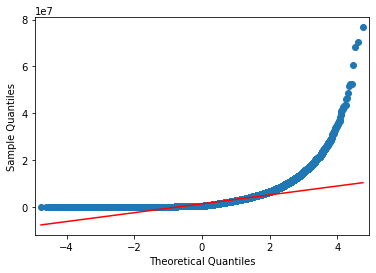

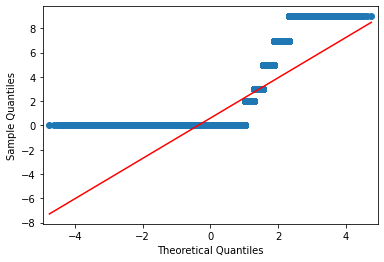

In [30]:
# Assumption 2: Normality
# Check normality using Q-Q plots and Shapiro-Wilk test
'''Normality: The data in each group should follow a roughly normal distribution. Normality is important because the t-test assumes that the sampling distribution of the means is normally distributed. You can check for normality using methods like histograms, Q-Q plots, or formal statistical tests (e.g., Shapiro-Wilk test).
'''
qqplot_column1 = sm.qqplot(df_order['Profit'], line='s')
qqplot_column2 = sm.qqplot(df_order['Discount'], line='s')
shapiro_column1 = stats.shapiro(df_order['Profit'])
shapiro_column2 = stats.shapiro(df_order['Discount'])


In [26]:
# Assumption 3: Homogeneity of Variance
# Check homoscedasticity using Levene's test
'''Homogeneity of Variance: The variances in the different groups being compared should be approximately equal (homoscedasticity). This assumption is important because the t-test assumes that the standard deviations of the two groups are equal. You can check for homogeneity of variance using statistical tests like Levene's test or by examining the spread of data within groups.
'''
levene_test = stats.levene(df_order['Profit'], df_order['Discount'])
levene_test

LeveneResult(statistic=427030.52199816314, pvalue=0.0)

In [27]:
# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: 701.4473583312518
P-Value: 0.0


In [28]:
# Check and print the results of the assumptions
print(f'Shapiro-Wilk Test - Column 1: W={shapiro_column1[0]}, p={shapiro_column1[1]}')
print(f'Shapiro-Wilk Test - Column 2: W={shapiro_column2[0]}, p={shapiro_column2[1]}')
print(f'Levene Test: W={levene_test[0]}, p={levene_test[1]}')


Shapiro-Wilk Test - Column 1: W=0.6690952777862549, p=0.0
Shapiro-Wilk Test - Column 2: W=0.41909754276275635, p=0.0
Levene Test: W=427030.52199816314, p=0.0


In [29]:

# Interpret the results
if p_value < 0.05:
    print('The means are significantly different.')
else:
    print('No significant difference found.')


The means are significantly different.
